In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/datasetmain.csv", low_memory=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

threshold = 0.8 # You can adjust this threshold
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, corr_matrix.iloc[i, j]))

# Sort by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the highly correlated pairs
print("Highly correlated features (absolute correlation >", threshold, "):")
for feature1, feature2, correlation in high_corr_pairs:
    print(f"- {feature1} and {feature2}: {correlation:.2f}")

Highly correlated features (absolute correlation > 0.8 ):
- longest_word_path and longest_words_raw: 0.97
- nb_eq and nb_and: 0.91
- avg_word_host and longest_word_host: 0.82
- avg_word_host and shortest_word_host: 0.80


In [ ]:
correlated_groups = []

# Keep track of features already added to a group
processed_features = set()

# Iterate through the sorted high_corr_pairs
for feature1, feature2, correlation in high_corr_pairs:
    if feature1 not in processed_features and feature2 not in processed_features:
        # If neither feature is processed, create a new group
        correlated_groups.append({feature1, feature2})
        processed_features.add(feature1)
        processed_features.add(feature2)
    elif feature1 not in processed_features:
        # If only feature1 is not processed, add it to the group containing feature2
        for group in correlated_groups:
            if feature2 in group:
                group.add(feature1)
                processed_features.add(feature1)
                break
    elif feature2 not in processed_features:
        # If only feature2 is not processed, add it to the group containing feature1
        for group in correlated_groups:
            if feature1 in group:
                group.add(feature2)
                processed_features.add(feature2)
                break
    else:
        # If both features are already processed, check if they are in the same group
        # If not, merge the groups
        group1 = None
        group2 = None
        for group in correlated_groups:
            if feature1 in group:
                group1 = group
            if feature2 in group:
                group2 = group
            if group1 and group2:
                break
        if group1 and group2 and group1 != group2:
            correlated_groups.remove(group2)
            group1.update(group2)

# Print the identified groups
print("\nIdentified groups of highly correlated features:")
for i, group in enumerate(correlated_groups):
    print(f"Group {i+1}: {group}")


Identified groups of highly correlated features:
Group 1: {'longest_words_raw', 'longest_word_path'}
Group 2: {'nb_and', 'nb_eq'}
Group 3: {'avg_word_host', 'shortest_word_host', 'longest_word_host'}


In [ ]:
features_to_keep = []

# Iterate through the correlated groups
for group in correlated_groups:
    # For simplicity, keep the first feature in each group
    features_to_keep.append(list(group)[0])

# Add the non-numeric columns and any numeric columns not in any group
all_columns = set(df.columns)
numeric_columns = set(df.select_dtypes(include='number').columns)
non_numeric_columns = all_columns - numeric_columns
features_to_keep.extend(list(non_numeric_columns))

# Add any numeric columns that were not in any correlated group
all_grouped_features = set().union(*correlated_groups)
ungrouped_numeric_features = numeric_columns - all_grouped_features
features_to_keep.extend(list(ungrouped_numeric_features))


# Create a new DataFrame with the selected features
df_reduced = df[features_to_keep].copy()

# Display the first few rows of the new DataFrame and its shape
print("Reduced DataFrame:")
display(df_reduced.head())
print("\nShape of the reduced DataFrame:", df_reduced.shape)

Reduced DataFrame:


,longest_words_raw,nb_and,avg_word_host,url,status,punycode,domain_with_copyright,avg_words_raw,login_form,shortest_words_raw,...,nb_qm,abnormal_subdomain,ratio_extHyperlinks,sfh,page_rank,empty_title,google_index,nb_www,length_words_raw,http_in_path
0,11,0,7.0,http://www.crestonwood.com/router.php,legitimate,0,1,5.750000,0,3,...,0,0,0.470588,0,4,0,1,1,4,0
1,32,0,19.0,http://shadetreetechnology.com/V4/validation/a...,phishing,0,0,15.750000,0,2,...,0,0,0.033333,0,2,0,1,0,4,0
2,17,2,8.4,https://support-appleld.com.secureupdate.duila...,phishing,0,0,8.250000,0,2,...,1,0,0.000000,0,0,0,1,0,12,0
3,5,0,5.0,http://rgipt.ac.in,legitimate,0,0,5.000000,0,5,...,0,0,0.026846,0,3,0,0,0,1,0
4,11,0,5.0,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,1,6.333333,1,3,...,0,0,0.529412,0,6,0,0,1,6,0



Shape of the reduced DataFrame: (11430, 85)


In [ ]:
df_reduced.columns

Index(['longest_words_raw', 'nb_and', 'avg_word_host', 'url', 'status',
       'punycode', 'domain_with_copyright', 'avg_words_raw', 'login_form',
       'shortest_words_raw', 'submit_email', 'domain_age', 'path_extension',
       'nb_star', 'nb_dollar', 'ratio_nullHyperlinks', 'nb_extCSS', 'port',
       'nb_dots', 'ip', 'nb_hyphens', 'phish_hints', 'suspecious_tld',
       'nb_hyperlinks', 'tld_in_path', 'char_repeat', 'ratio_intRedirection',
       'length_url', 'nb_semicolumn', 'ratio_intErrors', 'nb_colon', 'nb_or',
       'https_token', 'nb_at', 'ratio_extMedia', 'tld_in_subdomain',
       'ratio_digits_host', 'ratio_intMedia', 'nb_comma', 'shortest_word_path',
       'avg_word_path', 'nb_subdomains', 'shortening_service',
       'brand_in_subdomain', 'nb_external_redirection', 'dns_record',
       'domain_in_brand', 'nb_space', 'external_favicon', 'nb_slash',
       'nb_redirection', 'popup_window', 'whois_registered_domain',
       'domain_registration_length', 'nb_percent', 'o

In [ ]:
df_reduced.fillna(0, inplace=True)
display(df_reduced.head())

,longest_words_raw,nb_and,avg_word_host,url,status,punycode,domain_with_copyright,avg_words_raw,login_form,shortest_words_raw,...,nb_qm,abnormal_subdomain,ratio_extHyperlinks,sfh,page_rank,empty_title,google_index,nb_www,length_words_raw,http_in_path
0,11,0,7.0,http://www.crestonwood.com/router.php,legitimate,0,1,5.750000,0,3,...,0,0,0.470588,0,4,0,1,1,4,0
1,32,0,19.0,http://shadetreetechnology.com/V4/validation/a...,phishing,0,0,15.750000,0,2,...,0,0,0.033333,0,2,0,1,0,4,0
2,17,2,8.4,https://support-appleld.com.secureupdate.duila...,phishing,0,0,8.250000,0,2,...,1,0,0.000000,0,0,0,1,0,12,0
3,5,0,5.0,http://rgipt.ac.in,legitimate,0,0,5.000000,0,5,...,0,0,0.026846,0,3,0,0,0,1,0
4,11,0,5.0,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,1,6.333333,1,3,...,0,0,0.529412,0,6,0,0,1,6,0


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

# df.rename(columns={'status': 'status'}, inplace=True)
# Separate features and target
X = df_reduced.drop('status', axis=1)
y = df_reduced['status']

# Select only numeric columns for outlier detection
X_numeric = X.select_dtypes(include=np.number)

# Adjust contamination based on the expected proportion of outliers
iso_forest = IsolationForest(contamination='auto', random_state=42)
outliers = iso_forest.fit_predict(X_numeric)

# Filter out the outliers
df_reduced_cleaned = df_reduced[outliers == 1].copy()

print("Outliers removed using Isolation Forest.")
display(df_reduced_cleaned.head())
print("\nShape of the cleaned DataFrame:", df_reduced_cleaned.shape)

Outliers removed using Isolation Forest.


,longest_words_raw,nb_and,avg_word_host,url,status,punycode,domain_with_copyright,avg_words_raw,login_form,shortest_words_raw,...,nb_qm,abnormal_subdomain,ratio_extHyperlinks,sfh,page_rank,empty_title,google_index,nb_www,length_words_raw,http_in_path
0,11,0,7.0,http://www.crestonwood.com/router.php,legitimate,0,1,5.750000,0,3,...,0,0,0.470588,0,4,0,1,1,4,0
1,32,0,19.0,http://shadetreetechnology.com/V4/validation/a...,phishing,0,0,15.750000,0,2,...,0,0,0.033333,0,2,0,1,0,4,0
2,17,2,8.4,https://support-appleld.com.secureupdate.duila...,phishing,0,0,8.250000,0,2,...,1,0,0.000000,0,0,0,1,0,12,0
3,5,0,5.0,http://rgipt.ac.in,legitimate,0,0,5.000000,0,5,...,0,0,0.026846,0,3,0,0,0,1,0
4,11,0,5.0,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,1,6.333333,1,3,...,0,0,0.529412,0,6,0,0,1,6,0



Shape of the cleaned DataFrame: (11007, 85)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_reduced_cleaned.to_csv('/content/drive/MyDrive/datasetmain.csv', index=False)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CipherCop/datasetmain.csv")

In [ ]:
df.dtypes

,0
url,object
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
...,...
web_traffic,int64
dns_record,int64
google_index,int64
page_rank,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

data = labelencoder(df)
data.dropna(axis=0, inplace=True)

# Find missing values
missing_values = data.isna().sum()
print(missing_values)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [ ]:
from sklearn.utils import resample

def balance_data(data, random_state=0):
    X = data.drop("status", axis=1)
    y = data["status"]
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    balanced_data = pd.DataFrame(columns=data.columns)

    for label in class_counts.index:
        class_samples = data[data["status"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [ ]:
balanced_data = balance_data(data)
balanced_class_counts = balanced_data["status"].value_counts()
print(balanced_class_counts)

status
1    5715
0    5715
Name: count, dtype: int64


/tmp/ipython-input-1089488832.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


In [ ]:
X = data.drop(['status'], axis=1) # Drop both original and encoded Label
y = data['status']

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (11430, 88)
Shape of y: (11430,)


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [ ]:
print("Train features size : ",len(train_X))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_X))
print("Test features size : ",len(test_y))

Train features size :  9144
Train labels size :  9144
Test features size :  2286
Test features size :  2286


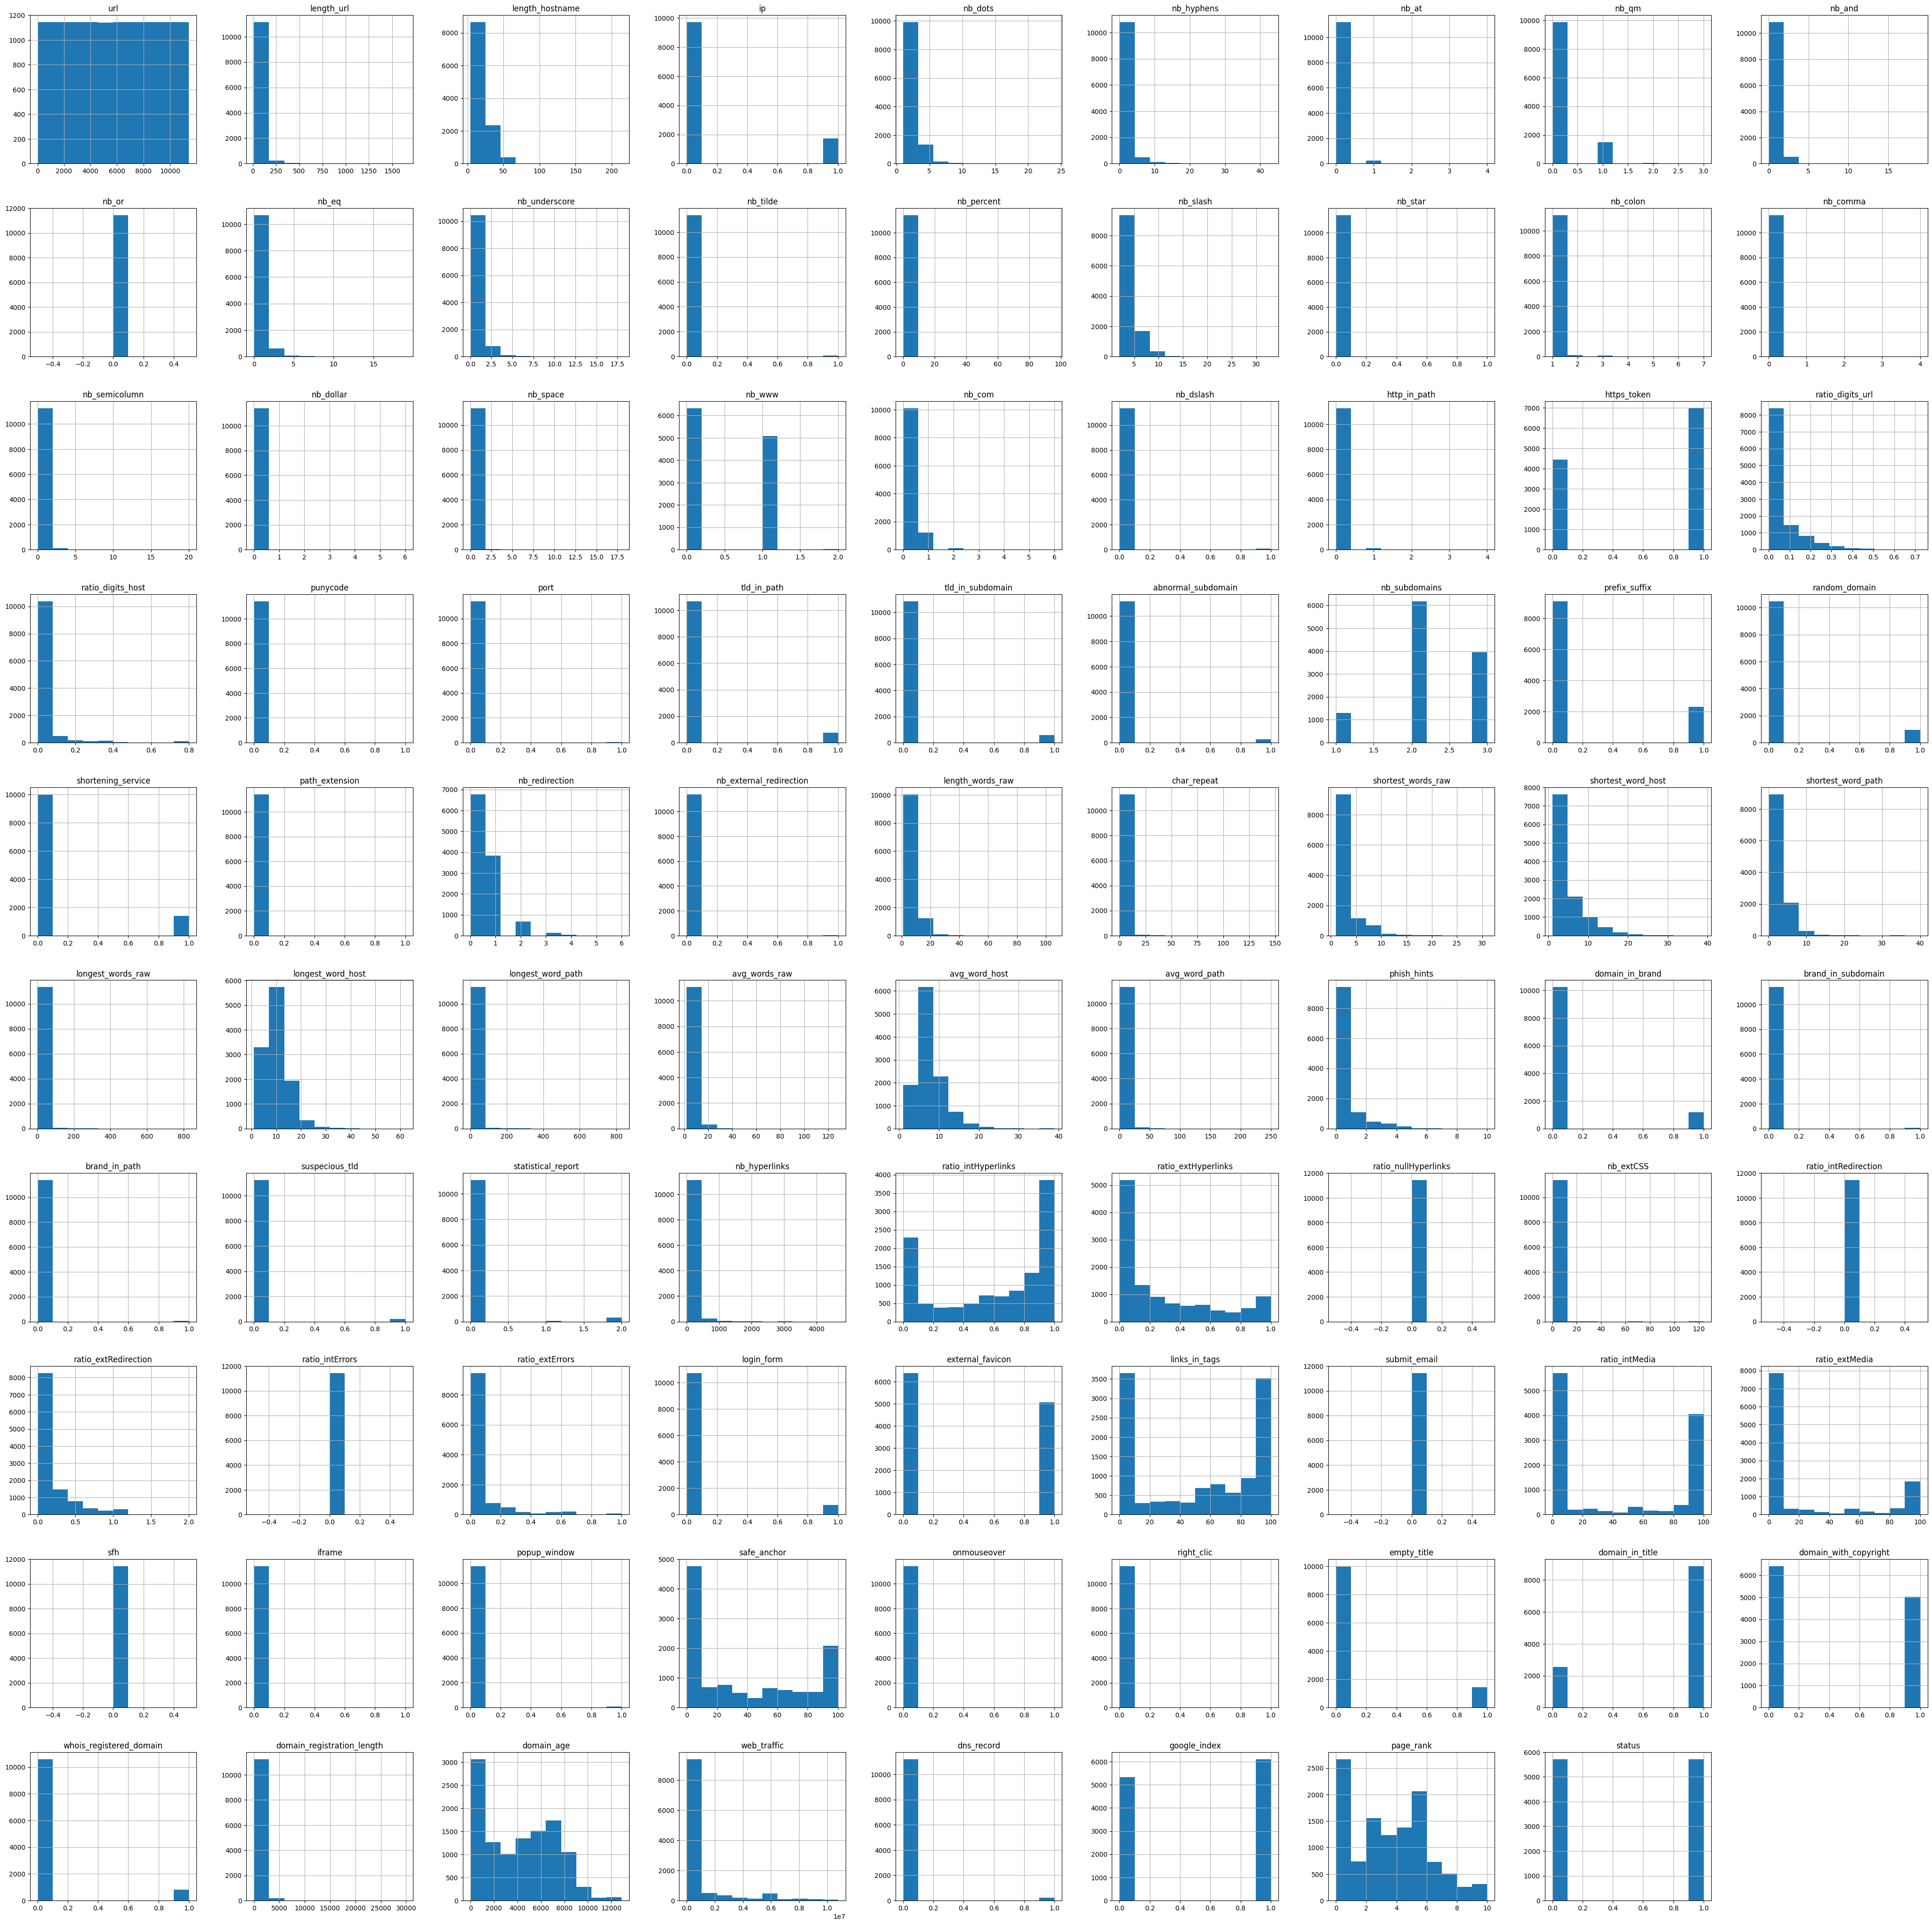

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(52,52))
plt.show()

Feature Importance:
google_index: 0.1596210594542038
page_rank: 0.10909353268796766
nb_hyperlinks: 0.08959602013043214
web_traffic: 0.06395171930838489
nb_www: 0.04920944780111682
longest_word_path: 0.03331467446061523
domain_age: 0.031661116987473585
ratio_extHyperlinks: 0.02907733508129691
phish_hints: 0.025460548899288213
url: 0.022119845413466642
ratio_intHyperlinks: 0.02075615275066351
safe_anchor: 0.020749126916471974
length_url: 0.019240026217941374
length_hostname: 0.017146400958328336
ratio_digits_url: 0.016801238978316455
domain_in_title: 0.015871882334057463
longest_words_raw: 0.015728131668534196
length_words_raw: 0.015338884902882075
ratio_extRedirection: 0.015049199870963863
avg_word_path: 0.014808345858765337
char_repeat: 0.013355429984951596
links_in_tags: 0.013120267672144048
nb_slash: 0.012224945166605812
domain_registration_length: 0.012025315072371631
shortest_word_host: 0.011864214140744494
ratio_digits_host: 0.010409575894814855
nb_hyphens: 0.009292848030747322
av

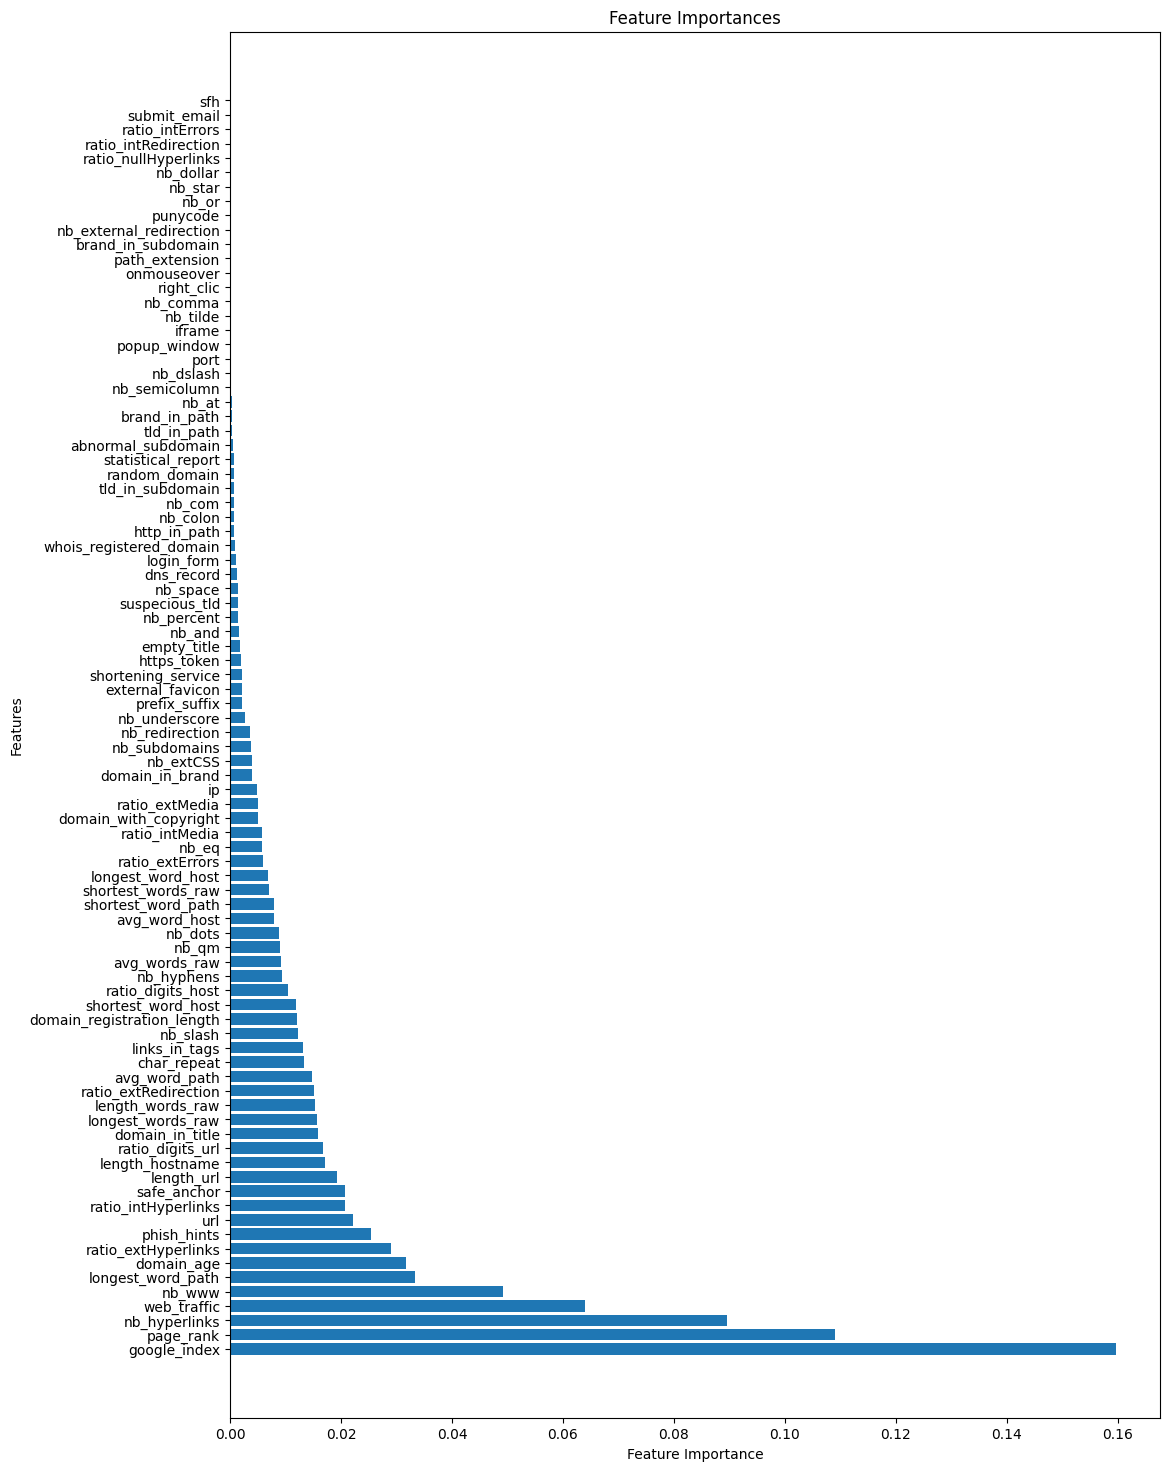

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_X, train_y)
feature_importance = random_forest_model.feature_importances_
feature_importance_dict = dict(zip(train_X.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

features, importance = zip(*sorted_feature_importance)
plt.figure(figsize=(12, 18))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


Gradient Boosting Model:


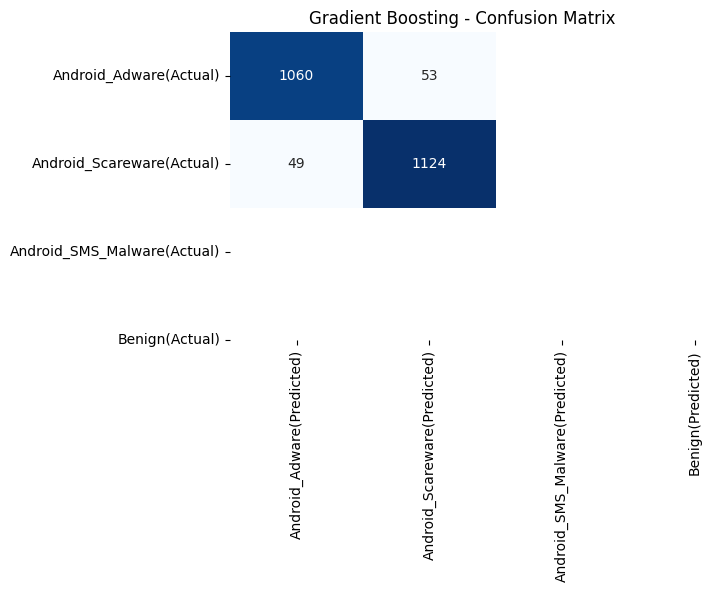

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1113
           1       0.95      0.96      0.96      1173

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286


Random Forest Model:


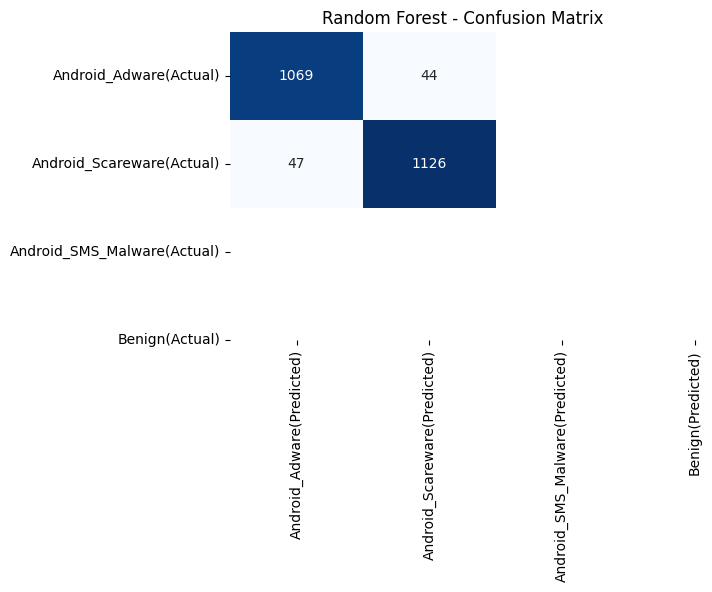

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1113
           1       0.96      0.96      0.96      1173

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286


AdaBoost Model:


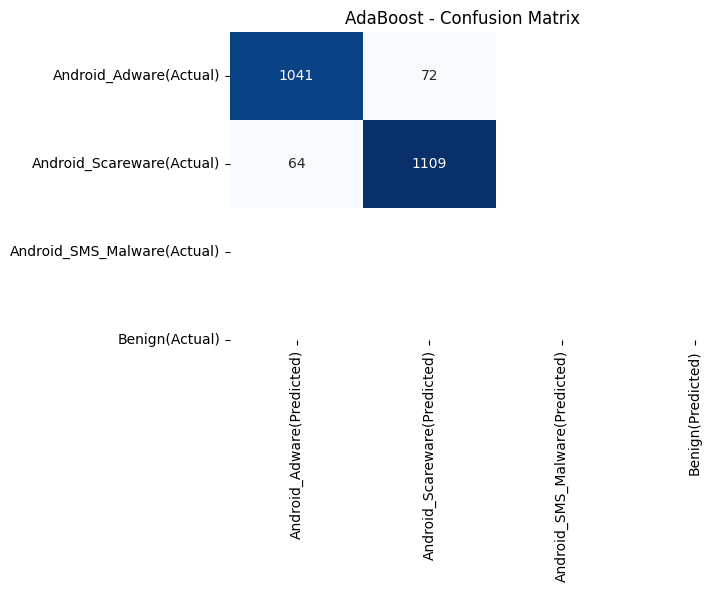

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1113
           1       0.94      0.95      0.94      1173

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286


Decision Tree Model:


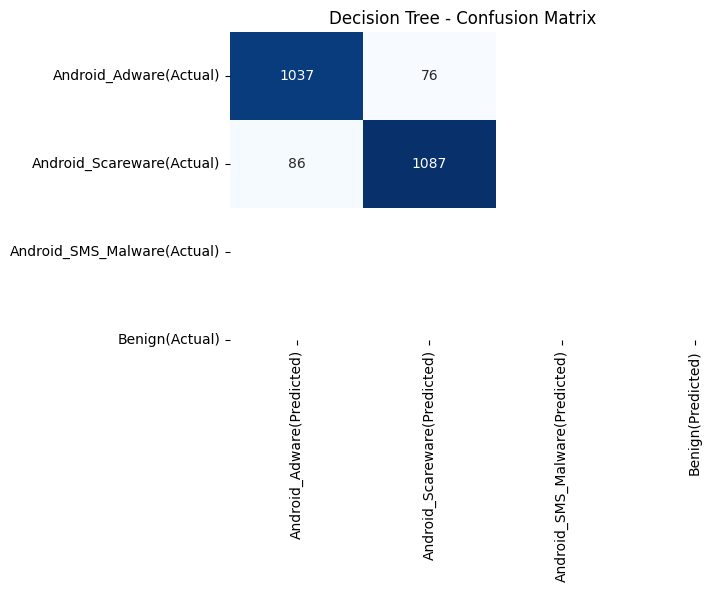

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1113
           1       0.93      0.93      0.93      1173

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286


Multi-layer Perceptron Model:


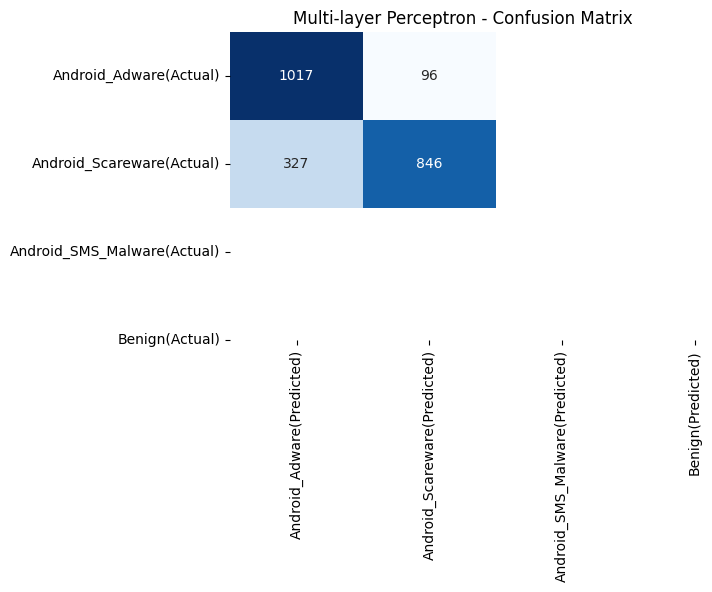

Multi-layer Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1113
           1       0.90      0.72      0.80      1173

    accuracy                           0.81      2286
   macro avg       0.83      0.82      0.81      2286
weighted avg       0.83      0.81      0.81      2286


Logistic Regression Model:


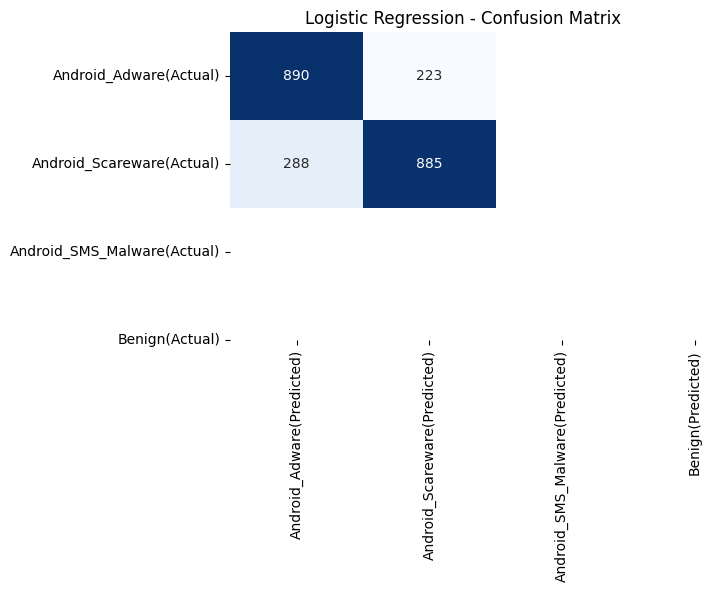

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1113
           1       0.80      0.75      0.78      1173

    accuracy                           0.78      2286
   macro avg       0.78      0.78      0.78      2286
weighted avg       0.78      0.78      0.78      2286


K-Nearest Neighbors Model:


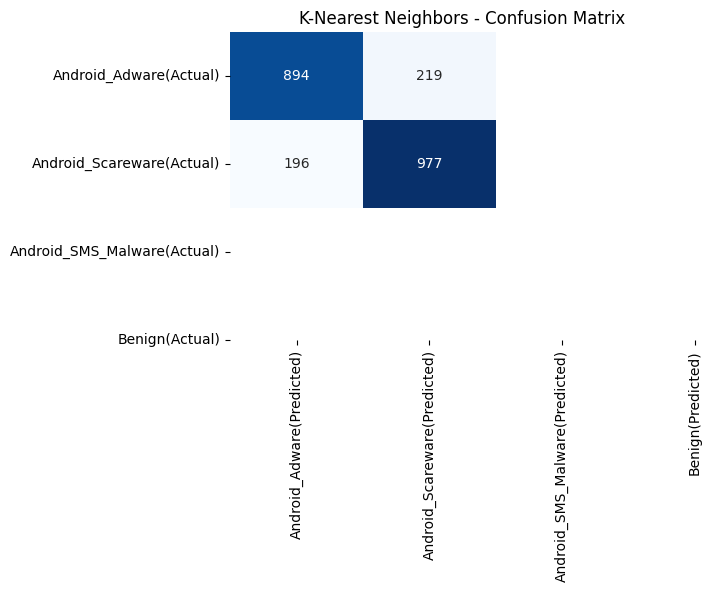

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1113
           1       0.82      0.83      0.82      1173

    accuracy                           0.82      2286
   macro avg       0.82      0.82      0.82      2286
weighted avg       0.82      0.82      0.82      2286


Naive Bayes (Gaussian) Model:


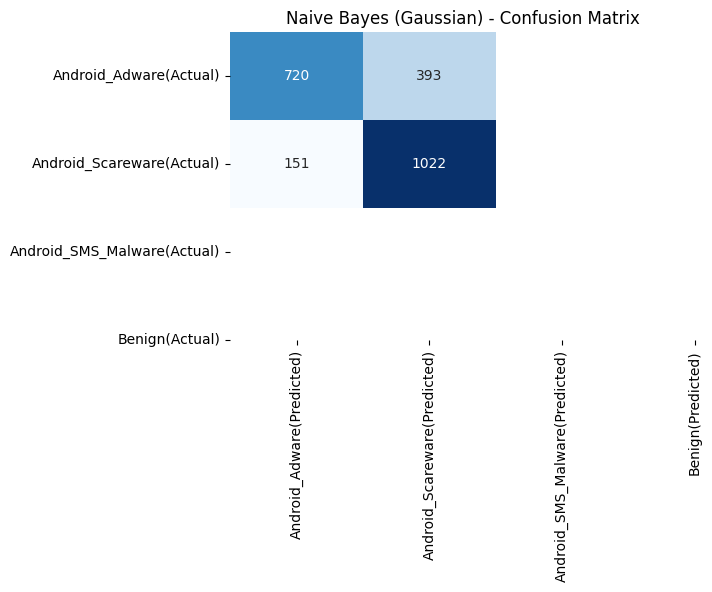

Naive Bayes (Gaussian) Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73      1113
           1       0.72      0.87      0.79      1173

    accuracy                           0.76      2286
   macro avg       0.77      0.76      0.76      2286
weighted avg       0.77      0.76      0.76      2286



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Multi-layer Perceptron': MLPClassifier(random_state=42),
    # 'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes (Gaussian)': GaussianNB(),
}

for model_name, model in models.items():
    print(f"\n{model_name} Model:")
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    cm = confusion_matrix(test_y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Malwaree(Predicted)', 'Benign(Predicted)'], yticklabels=['Malware(Actual)', 'Benign(Actual)'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    classification_rep = classification_report(test_y, y_pred)
    print(f"{model_name} Classification Report:\n", classification_rep)